# Titanic Survival Analysis
Analyzing which factors affect the survival of passengers in titanic using matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import zipfile
import os

zip_path = r"C:\Users\Amandeep Pathania\Downloads\titanic.zip"


extract_to = r"C:\Users\Amandeep Pathania\Downloads\titanic"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(os.listdir(extract_to))


['gender_submission.csv', 'test.csv', 'train.csv']


In [3]:
df = pd.read_csv(r"C:\Users\Amandeep Pathania\Downloads\titanic\train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape
df.info()
df.columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
print(df['Age'].isnull().sum())      # Number of missing values
print(df['Age'].notnull().sum())     # Number of non-missing values
print(df['Age'].dtype)               # Confirm data type
print(df['Age'].unique())            # See what's actually inside



177
714
float64
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns='Cabin')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


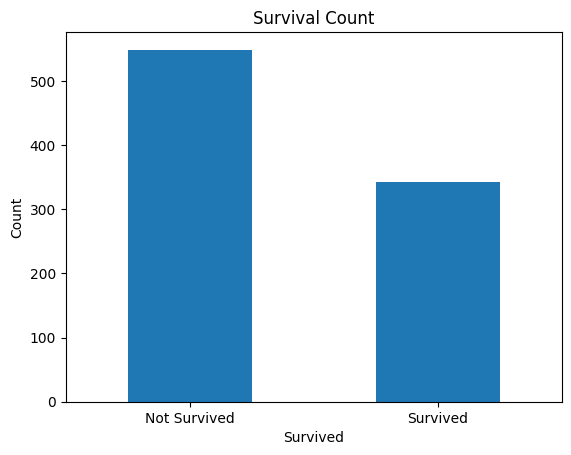

In [10]:
df['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Count')
plt.xticks([0,1],['Not Survived','Survived'],rotation = 0)
plt.ylabel('Count')
plt.show()

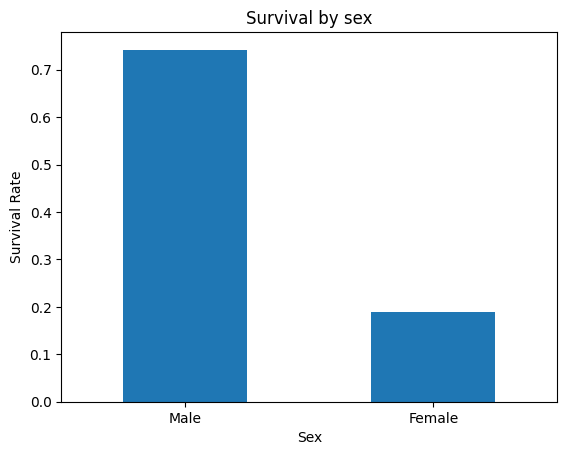

In [14]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title('Survival by sex')
plt.xticks([0,1],['Male','Female'],rotation = 0)
plt.ylabel('Survival Rate')
plt.show()

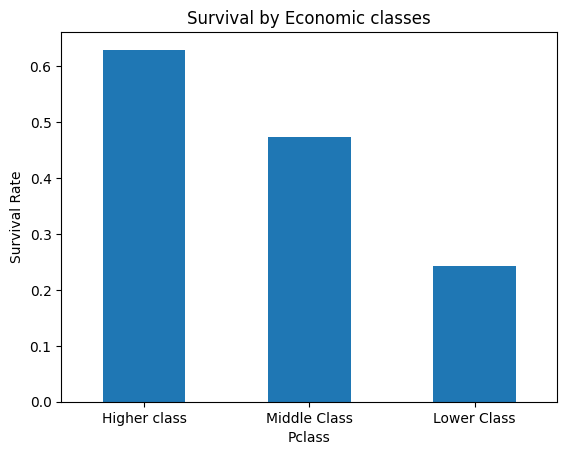

In [15]:
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.xticks([0,1,2],['Higher class','Middle Class','Lower Class'],rotation=0)
plt.title('Survival by Economic classes')
plt.ylabel('Survival Rate')
plt.show()

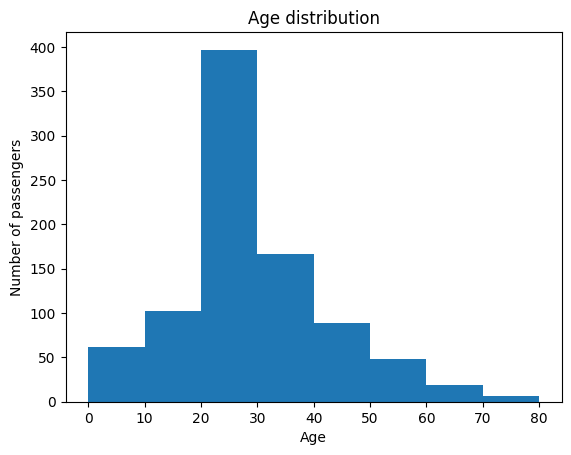

In [23]:
df['Age'].plot(kind='hist',bins=range(0, 81, 10), rwidth=1)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.show()

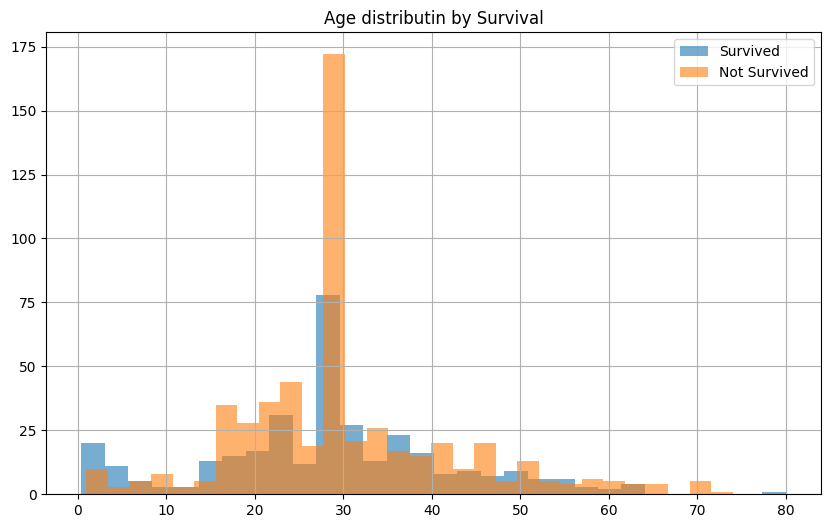

In [25]:
plt.figure(figsize=(10,6))
df[df['Survived']==1]['Age'].hist(alpha=0.6, label = 'Survived', bins = 30)
df[df['Survived']==0]['Age'].hist(alpha=0.6, label='Not Survived', bins=30)
plt.legend()
plt.title("Age distributin by Survival")
plt.show()

# Key Insights
- Number of people who survived are less compared to number of people who could not survive.
- Male survival rate is higher than female survival rate.
- People who belonged to higher economic class survived more than people who belonged to lower economic class.
- Titanic ship had most people in their 20s.